# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [8]:
path_original = r'C:\Users\shinoki\Documents\data_science\tarefa_python\UCI HAR Dataset\\'

y_train = pd.read_csv(path_original + 'train\\y_train.txt', header=None, names=['activity'])
y_test = pd.read_csv(path_original + 'test\\y_test.txt', header=None, names=['activity'])

path = r'C:\Users\shinoki\Documents\data_science\tarefa_python\\'
y_train.to_csv(path + 'y_train.csv', index=False)
y_test.to_csv(path + 'y_test.csv', index=False)



### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [10]:
X_train_reduced, X_val, y_train_reduced, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

print(f'Tamanho treino reduzido: {X_train_reduced.shape[0]} amostras')
print(f'Tamanho validação: {X_val.shape[0]} amostras')

Tamanho treino reduzido: 5514 amostras
Tamanho validação: 1838 amostras


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [11]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train.values.ravel())  
importances = clf.feature_importances_

import pandas as pd
feat_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})

feat_importance_sorted = feat_importance.sort_values(by='importance', ascending=False)

top3_features = feat_importance_sorted.head(3)

print("Top 3 variáveis importantes:")
print(top3_features)


Top 3 variáveis importantes:
                             feature  importance
52               tGravityAcc-min()-X    0.283674
389  fBodyAccJerk-bandsEnergy()-1,16    0.254900
559             angle(Y,gravityMean)    0.166670


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [13]:
%%time

top3_vars = ['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,16', 'angle(Y,gravityMean)']

X_train_reduced_top3 = X_train_reduced[top3_vars]
X_val_top3 = X_val[top3_vars]

clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20)
clf.fit(X_train_reduced_top3, y_train_reduced.values.ravel())

path = clf.cost_complexity_pruning_path(X_train_reduced_top3, y_train_reduced.values.ravel())
ccp_alphas = path.ccp_alphas

ccp_alphas = np.unique(ccp_alphas[ccp_alphas > 0])
ccp_alphas_sampled = ccp_alphas[::5]

print("ccp_alphas selecionados:", ccp_alphas_sampled)



ccp_alphas selecionados: [7.99062908e-06 1.48080116e-05 4.47153181e-05 1.11815400e-04
 1.49619151e-04 2.36047504e-04 3.56438552e-04 4.22132653e-04
 5.49650140e-04 6.81899062e-04 7.79037038e-04 9.30300897e-04
 1.12330919e-03 1.73351139e-03 2.18234517e-03 3.00764678e-03
 7.53305455e-03 1.67255730e-01]
CPU times: total: 46.9 ms
Wall time: 56.8 ms


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [15]:
melhor_alpha = None
melhor_acc = 0

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20, ccp_alpha=alpha)
    clf.fit(X_train_reduced_top3, y_train_reduced.values.ravel())
    y_pred_val = clf.predict(X_val_top3)
    acc = accuracy_score(y_val.values.ravel(), y_pred_val)
    print(f"ccp_alpha: {alpha:.8f} -> acurácia validação: {acc:.4f}")
    if acc > melhor_acc:
        melhor_acc = acc
        melhor_alpha = alpha

print(f"\nMelhor ccp_alpha: {melhor_alpha:.8f} com acurácia {melhor_acc:.4f}")


ccp_alpha: 0.00000799 -> acurácia validação: 0.8825
ccp_alpha: 0.00000871 -> acurácia validação: 0.8825
ccp_alpha: 0.00001295 -> acurácia validação: 0.8825
ccp_alpha: 0.00001354 -> acurácia validação: 0.8825
ccp_alpha: 0.00001468 -> acurácia validação: 0.8825
ccp_alpha: 0.00001481 -> acurácia validação: 0.8825
ccp_alpha: 0.00001509 -> acurácia validação: 0.8825
ccp_alpha: 0.00001600 -> acurácia validação: 0.8825
ccp_alpha: 0.00001608 -> acurácia validação: 0.8825
ccp_alpha: 0.00001649 -> acurácia validação: 0.8825
ccp_alpha: 0.00004472 -> acurácia validação: 0.8825
ccp_alpha: 0.00007024 -> acurácia validação: 0.8825
ccp_alpha: 0.00007376 -> acurácia validação: 0.8825
ccp_alpha: 0.00009166 -> acurácia validação: 0.8825
ccp_alpha: 0.00009226 -> acurácia validação: 0.8825
ccp_alpha: 0.00011182 -> acurácia validação: 0.8825
ccp_alpha: 0.00012252 -> acurácia validação: 0.8825
ccp_alpha: 0.00012413 -> acurácia validação: 0.8825
ccp_alpha: 0.00014549 -> acurácia validação: 0.8825
ccp_alpha: 0

Acurácia na base de teste: 0.6973


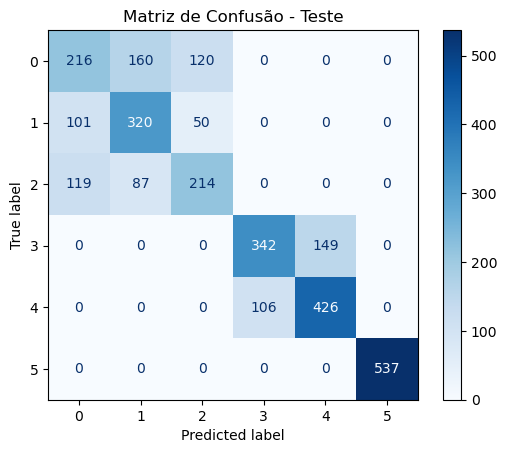

In [16]:
melhor_ccp_alpha = 0.00086474  

clf_final = DecisionTreeClassifier(random_state=42, min_samples_leaf=20, ccp_alpha=melhor_ccp_alpha)
clf_final.fit(X_train_reduced_top3, y_train_reduced.values.ravel())

X_test_top3 = X_test[top3_vars]

y_pred = clf_final.predict(X_test_top3)

acc = accuracy_score(y_test.values.ravel(), y_pred)
print(f"Acurácia na base de teste: {acc:.4f}")

cm = confusion_matrix(y_test.values.ravel(), y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Teste")
plt.show()